<a href="https://colab.research.google.com/github/AI-Cultural-Heritage-Lab/ushmm_model_comparisons/blob/main/Experiment_1_AW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1a. Setup

In [ ]:
#import API keys and mount google drive
from google.colab import drive
from google.colab import userdata
!pip install --upgrade openai
#make sure we have openAI and Gemini access tokens before proceeding (key icon on left)
import os
from openai import OpenAI
import google.generativeai as genai
# Pass the API key to Open AI
os.environ['OPEN_AI_API_KEY'] = userdata.get("OPEN_AI_PROJECT_KEY")
client = OpenAI(api_key=os.environ.get("OPEN_AI_API_KEY"))
# Pass the API key to Gemini
os.environ['GEMINI_API_KEY'] = userdata.get("GEMINI_PROJECT_KEY")
# Pass the API key to Grok
os.environ['GROK_API_KEY'] = userdata.get("GROK_PROJECT_KEY")
# Pass the API key to SERP
os.environ['SERP_API_KEY'] = userdata.get("SERP_PROJECT_KEY")
#mount drive
drive.mount('/content/drive')

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 680.9/680.9 kB 10.4 MB/s eta 0:00:00
  Attempting uninstall: openai
    Found existing installation: openai 1.78.0
    Uninstalling openai-1.78.0:
      Successfully uninstalled openai-1.78.0
Mounted at /content/drive


In [ ]:
## Import Data

import gdown
import pandas as pd

def download_data_from_gdrive(url, output_file="file.xlsx"):
    export_url= f"{url}"+"/export?format=xlsx"
    gdown.download(export_url, output_file, quiet=False, fuzzy=True)
    return output_file

# Import Holocaust Encyclopedia - search queries from United States 2024
url_US = 'https://docs.google.com/spreadsheets/d/1RP_hqP3RRwR-PSx-dpHf7-GS3OmI6NvE'
export_url_US= f"{url_US}"+"/export?format=xlsx"
temp_file_US = "file_US.xlsx"

#search queries from Russia
url_RUS = 'https://docs.google.com/spreadsheets/d/1f4Sl6chwo9Wf7AQlZc9xjRtBonErQd3s5zzZBjeLkSQ/edit?gid=2013358683#gid=2013358683'
export_url_RUS= f"{url_RUS}"+"/export?format=xlsx"
temp_file_RUS = "file_RUS.xlsx"

#ALL 6000 search queries (1000 for each country - USA, Germany, S Korea, Russia, Turkey, China)
url_ALL = 'https://docs.google.com/spreadsheets/d/1i6PRehieuZKl2Zk7EoJFjwRuS4e-NR8mtBAbTt6rZ4c/edit?gid=525940975#gid=525940975'
export_url_ALL= f"{url_ALL}"+"/export?format=xlsx"
temp_file_ALL = "file_ALL.xlsx"

# Download the file
#gdown.download(export_url_US, temp_file_US, quiet=False, fuzzy=True)
#gdown.download(export_url_RUS, temp_file_RUS, quiet=False, fuzzy=True)
#gdown.download(export_url_ALL, temp_file_ALL, quiet=False, fuzzy=True)

# Load the Excel file into pandas
df_ALL = pd.read_excel(temp_file_ALL)

# Display the DataFrame
print(df_ALL.head())

# Import US Queries with LLM Responses and Composite Scores

In [ ]:
import pandas as pd
df_c = pd.read_excel("US Queries with LLM Responses and Composite Scores.xlsx")
print(df_c.head())

        location                            Top queries  \
0  United States  how many people died in the holocaust   
1  United States                      armenian genocide   
2  United States                 holocaust encyclopedia   
3  United States                    first they came for   
4  United States                              holocaust   

                                       ushmm_article  \
0  #How Many People did the Nazis Murder? | Holoc...   
1  #The Armenian Genocide (1915-16): Overview | H...   
2  #Introduction to the Holocaust: What was the H...   
3  #Martin Niemöller: "First they came for the So...   
4  #Introduction to the Holocaust: What was the H...   

                                     GPT-4o Response  \
0  Approximately six million Jews were killed dur...   
1  The Armenian Genocide was a systematic mass ex...   
2  The Holocaust Encyclopedia is a comprehensive ...   
3  The phrase "First they came for..." is the beg...   
4  The Holocaust was the sys

# 1b. Filter Data for Link Frequency Analysis

In [ ]:
import pandas as pd
import re
from collections import Counter

# Drop NaNs in 'ushmm_links'
links_series = df_ALL['ushmm_links'].dropna()

# Step 1: Use regex to extract full valid URLs (commas are allowed)
url_pattern = re.compile(r'https?://[^\s\'"<>]+')

extracted_links = []
for entry in links_series:
    links_found = url_pattern.findall(entry)
    # Now safely strip fragments from each URL
    cleaned_links = [re.sub(r'#.*$', '', link) for link in links_found]
    extracted_links.extend(cleaned_links)

# Step 2: Remove fragment identifiers (anything after '#')
normalized_links = [re.sub(r'#.*$', '', link) for link in extracted_links]

# Step 3: Count the frequency of each normalized link
normalized_link_counts = Counter(normalized_links)

# Step 4: Convert to a DataFrame and sort
normalized_link_counts_df = pd.DataFrame(
    normalized_link_counts.items(), columns=['Link', 'Frequency']
).sort_values(by='Frequency', ascending=False).reset_index(drop=True)

# Display the result
print(normalized_link_counts_df.head())

from IPython.display import display
display(normalized_link_counts_df)

print(len(df_ALL['ushmm_links']))

# Count total number of entries (including duplicates)
print(len(normalized_links))

normalized_link_counts_df.to_csv('normalized_link_counts.csv', index=False)

                                                Link  Frequency
0  https://encyclopedia.ushmm.org/content/tr/arti...        308
1  https://encyclopedia.ushmm.org/content/tr/arti...        240
2  https://encyclopedia.ushmm.org/content/ru/arti...        239
3  https://encyclopedia.ushmm.org/content/ru/arti...        226
4  https://encyclopedia.ushmm.org/content/ru/arti...        200


,Link,Frequency
0,https://encyclopedia.ushmm.org/content/tr/arti...,308
1,https://encyclopedia.ushmm.org/content/tr/arti...,240
2,https://encyclopedia.ushmm.org/content/ru/arti...,239
3,https://encyclopedia.ushmm.org/content/ru/arti...,226
4,https://encyclopedia.ushmm.org/content/ru/arti...,200
...,...,...
2765,https://encyclopedia.ushmm.org/content/en/time...,1
2766,https://encyclopedia.ushmm.org/content/zh/id-c...,1
2767,https://encyclopedia.ushmm.org/content/zh/arti...,1
2768,https://encyclopedia.ushmm.org/content/en/time...,1


6000
16386


In [ ]:
# Step 5: Define a function to extract the language code from the URL
def extract_language(link):
    match = re.search(r'/content/([a-z]{2})/', link)
    return match.group(1) if match else 'unknown'

# Step 6: Apply the function to create a Language column
normalized_link_counts_df['Language'] = normalized_link_counts_df['Link'].apply(extract_language)

# Step 7: Group by language and sum the frequencies
language_grouped_df = normalized_link_counts_df.groupby('Language')['Frequency'].sum().reset_index()
language_grouped_df = language_grouped_df.sort_values(by='Frequency', ascending=False)

# Step 8: Display the grouped result
print(language_grouped_df)

   Language  Frequency
3        en       5832
13       ru       2622
14       tr       2417
11       ko       2020
16  unknown       1633
17       zh        931
1        de        520
10       ja        128
4        es        110
0        ar         83
15       uk         24
9        it         16
5        fa         15
2        el         10
6        fr          8
12       pl          8
7        hu          7
8        id          2


In [ ]:
# Step 9: Filter for selected languages
target_languages = {'en', 'ru', 'tr', 'ko', 'zh', 'de'}
filtered_links_df = normalized_link_counts_df[normalized_link_counts_df['Language'].isin(target_languages)].copy()

# Step 10: Extract article slug from the URL
def extract_slug(link):
    match = re.search(r'/content/[a-z]{2}/(.+)', link)
    return match.group(1) if match else 'unknown'

filtered_links_df['Article Slug'] = filtered_links_df['Link'].apply(extract_slug)

# Step 11: Sort by language and frequency
top_articles_by_language = filtered_links_df.sort_values(['Language', 'Frequency'], ascending=[True, False])

# Step 12: Preview result
print(top_articles_by_language.head())


                                                 Link  Frequency Language  \
17  https://encyclopedia.ushmm.org/content/de/arti...         86       de   
49  https://encyclopedia.ushmm.org/content/de/arti...         51       de   
66  https://encyclopedia.ushmm.org/content/de/arti...         41       de   
70  https://encyclopedia.ushmm.org/content/de/arti...         40       de   
85  https://encyclopedia.ushmm.org/content/de/arti...         34       de   

                                         Article Slug  
17  article/documenting-numbers-of-victims-of-the-...  
49  article/what-groups-of-people-did-the-nazis-ta...  
66                   article/killing-centers-in-depth  
70                                    article/aryan-1  
85  article/martin-niemoeller-first-they-came-for-...  


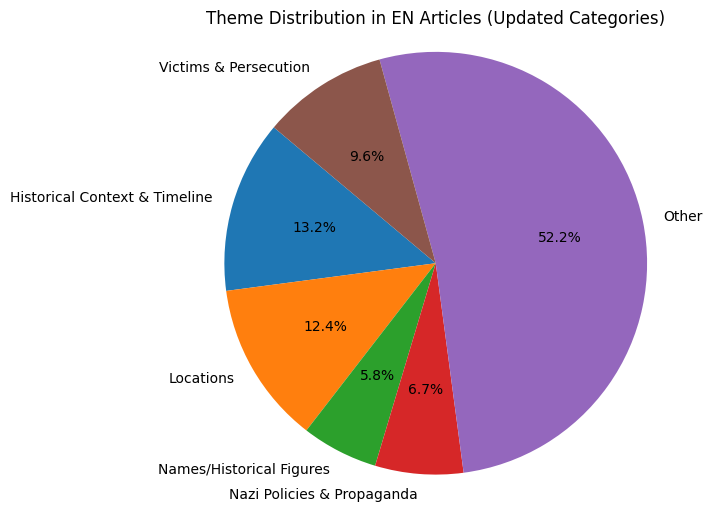

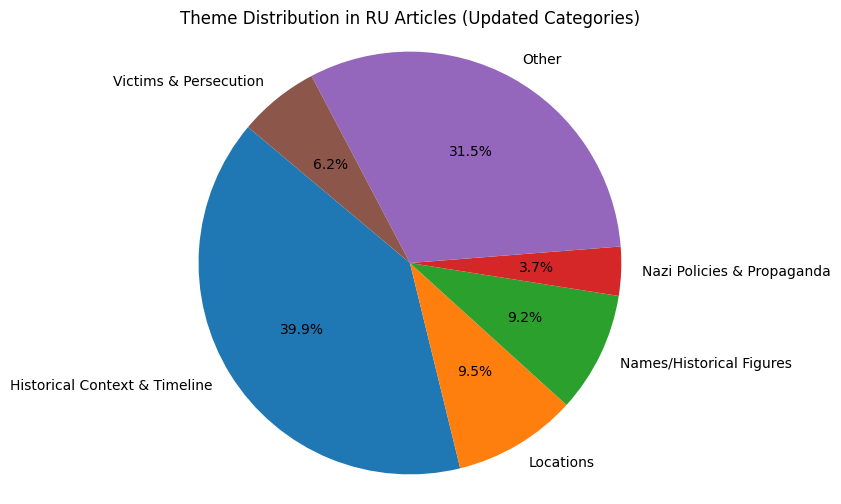

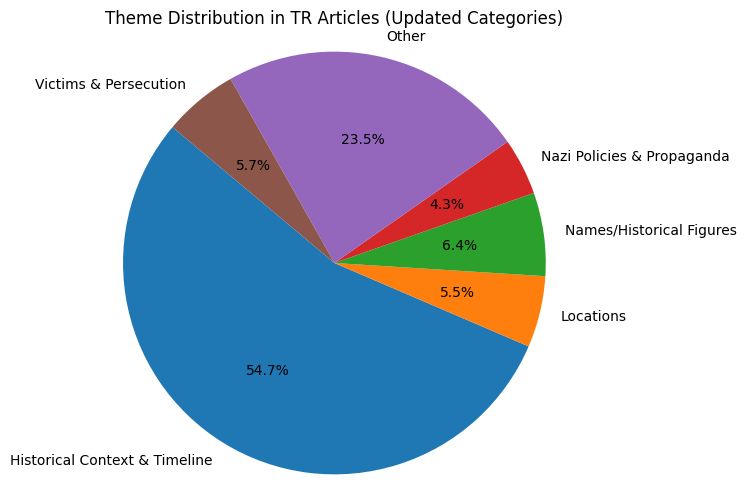

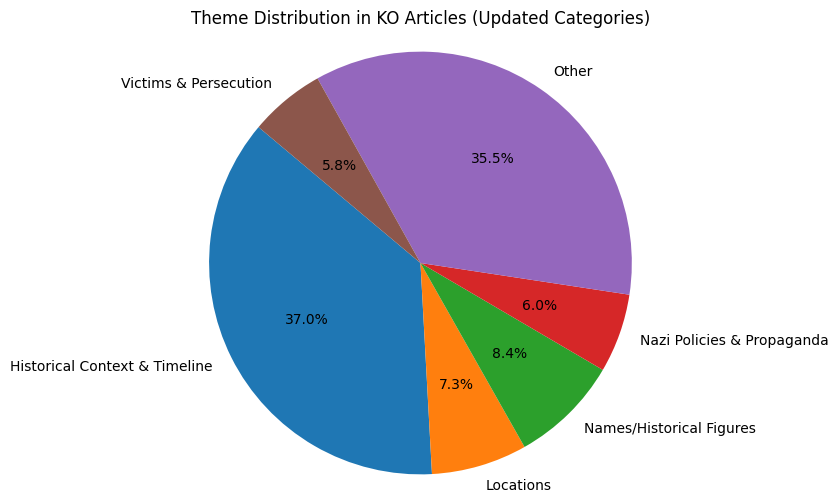

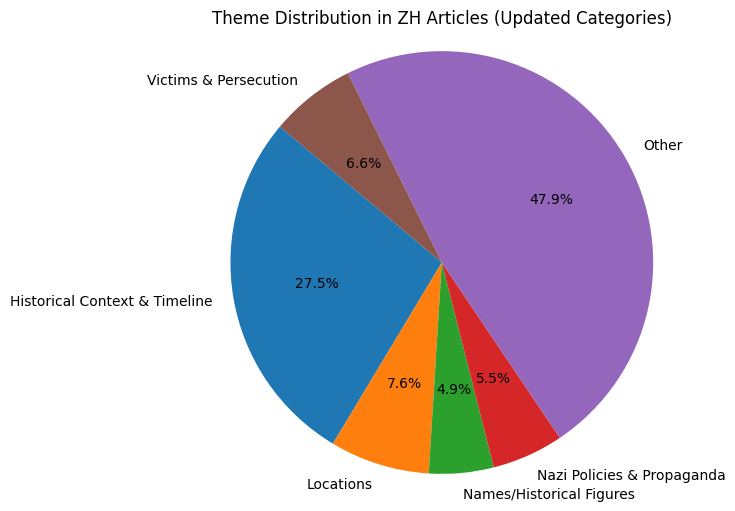

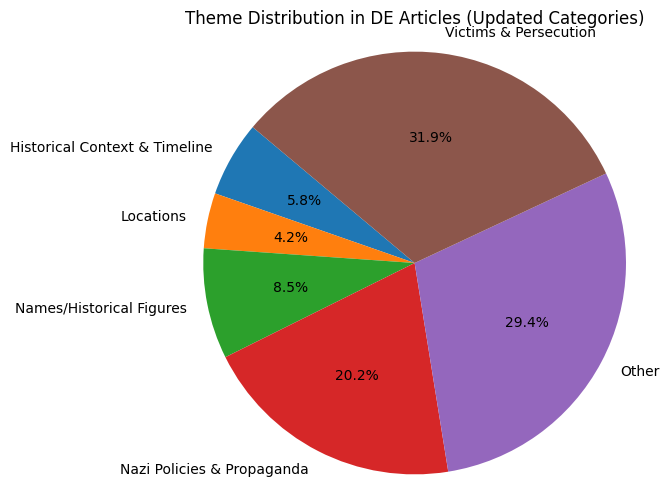

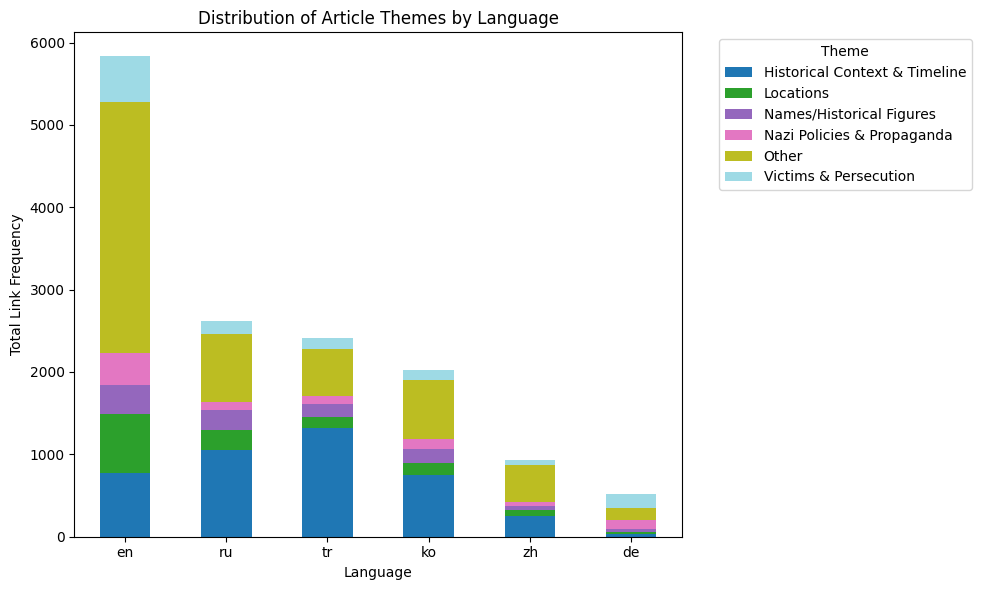

In [ ]:
import matplotlib.pyplot as plt
# Categorize slugs into themes (excluding "Memory & Education")
def categorize_slug(slug):
    slug = slug.lower()
    if any(k in slug for k in ['victim', 'persecution', 'ghetto', 'disabled', 'survivor', 'killing-center', 'refugee', 'roma']):
        return 'Victims & Persecution'
    elif any(k in slug for k in ['propaganda', 'nuremberg', 'aryan', 'eugenics', 'law', 'boycott', 'nazis']):
        return 'Nazi Policies & Propaganda'
    elif any(k in slug for k in ['timeline', 'invasion', 'liberation', 'deportation', 'occupation', 'world-war']):
        return 'Historical Context & Timeline'
    elif any(k in slug for k in ['frank', 'wiesel', 'niemoeller', 'himmler', 'hitler', 'goebbels']):
        return 'Names/Historical Figures'
    elif any(k in slug for k in ['auschwitz', 'lodz', 'warsaw', 'camp', 'europe', 'germany', 'poland']):
        return 'Locations'
    else:
        return 'Other'

filtered_links_df['Category'] = filtered_links_df['Article Slug'].apply(categorize_slug)

# Group by language and category
grouped = filtered_links_df.groupby(['Language', 'Category'])['Frequency'].sum().reset_index()

# Pie Charts: One per language
languages = ['en', 'ru', 'tr', 'ko', 'zh', 'de']
for lang in languages:
    lang_data = grouped[grouped['Language'] == lang]
    if not lang_data.empty:
        plt.figure(figsize=(6, 6))
        plt.pie(lang_data['Frequency'], labels=lang_data['Category'], autopct='%1.1f%%', startangle=140)
        plt.title(f'Theme Distribution in {lang.upper()} Articles (Updated Categories)')
        plt.axis('equal')
        plt.show()

# Stacked Bar Chart
pivot_df = grouped.pivot(index='Language', columns='Category', values='Frequency').fillna(0)
pivot_df = pivot_df.loc[languages]  # Ensure consistent language order

pivot_df.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='tab20')
plt.title("Distribution of Article Themes by Language")
plt.ylabel("Total Link Frequency")
plt.xlabel("Language")
plt.xticks(rotation=0)
plt.legend(title="Theme", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [ ]:
# Step 1: Group total frequencies per language for normalization
language_totals = filtered_links_df.groupby('Language')['Frequency'].sum().to_dict()

# Step 2: Create a dictionary to store updated DataFrames per language
relative_freq_tables = {}

# Step 3: Loop through each language and calculate relative frequency
for lang in ['en', 'ru', 'tr', 'ko', 'zh', 'de']:
    lang_df = filtered_links_df[filtered_links_df['Language'] == lang].copy()

    # Get total frequency for that language
    total_links = language_totals.get(lang, 1)  # Use 1 to avoid division by zero

    # Compute relative frequency (%)
    lang_df['Relative Frequency (%)'] = 100 * lang_df['Frequency'] / total_links

    # Sort by frequency and store the selected columns
    lang_df = lang_df.sort_values(by='Frequency', ascending=False).reset_index(drop=True)
    relative_freq_tables[lang.upper()] = lang_df[['Link', 'Frequency', 'Relative Frequency (%)', 'Article Slug', 'Category']]

In [ ]:
#find all queries that did not return an article (errored out)
df_article_errors = df_ALL[df_ALL["ushmm_article"].str.startswith("Error: No", na=False)][
    ["id", "location", "Top queries", "ushmm_links", "ushmm_article"]
]
print(df_article_errors.head())
df_article_errors.to_csv('queries_with_article_errors.csv', index=False)

      id       location                          Top queries  \
66    66  United States                   hitler youth knife   
106  106  United States                           blitzkrieg   
108  108  United States  map of concentration camp locations   
115  115  United States                        auschwitz map   
144  144  United States                     map of auschwitz   

                                           ushmm_links  \
66   ['https://encyclopedia.ushmm.org/content/en/ar...   
106  ['https://encyclopedia.ushmm.org/content/en/ga...   
108  ['https://encyclopedia.ushmm.org/content/en/ga...   
115  ['https://encyclopedia.ushmm.org/content/en/ga...   
144  ['https://encyclopedia.ushmm.org/content/en/ga...   

                                         ushmm_article  
66   Error: No article or main content found on htt...  
106  Error: No article or main content found on htt...  
108  Error: No article or main content found on htt...  
115  Error: No article or main content

# 2. Define functions for obtaining quantitative metrics

READABILITY METRICS

In [ ]:
#Word Count
import re
def word_count(text):
    #Returns the number of words in a given text using regex
    words = re.findall(r'\b\w+\b', text)
    return len(words)

#Flesch Reading Score
def count_sentences(text):
    """Counts the number of sentences based on punctuation."""
    return max(1, len(re.findall(r'[.!?]', text)))  # Avoid zero sentences

def count_words(text):
    """Counts the number of words in the text."""
    return max(1, len(text.split()))  # Avoid division by zero

def count_syllables(word):
    """Counts the number of syllables in a word using regex heuristics."""
    word = word.lower()
    syllables = re.findall(r'[aeiouy]+', word)  # Matches vowel clusters
    if word.endswith(("es", "ed")) and len(syllables) > 1:
        syllables.pop()  # Discount silent syllables
    return max(1, len(syllables))

def count_total_syllables(text):
    """Counts the total number of syllables in the text."""
    words = re.findall(r'\b\w+\b', text)  # Extract words
    return sum(count_syllables(word) for word in words)

def flesch_reading_ease(text):
    """Calculates the Flesch Reading Ease Score."""
    words = count_words(text)
    sentences = count_sentences(text)
    syllables = count_total_syllables(text)

    asl = words / sentences  # Average Sentence Length
    asw = syllables / words  # Average Syllables per Word

    score = 206.835 - (1.015 * asl) - (84.6 * asw)
    return round(score, 2)

#Coleman Liau Index
def count_letters(text):
    """Counts the number of letters (A-Z, a-z) in the text."""
    return sum(c.isalpha() for c in text)

def count_sentences(text):
    """Counts the number of sentences based on punctuation."""
    return max(1, len(re.findall(r'[.!?]', text)))  # Avoid zero sentences

def coleman_liau_index(text):
    """Calculates the Coleman-Liau Index for readability assessment."""
    letters = count_letters(text)
    words = count_words(text)
    sentences = count_sentences(text)

    L = (letters / words) * 100  # Average letters per 100 words
    S = (sentences / words) * 100  # Average sentences per 100 words

    CLI = 0.0588 * L - 0.296 * S - 15.8
    return round(CLI, 2)

SIMILARITY METRICS

In [ ]:
#Cosine Similarity

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np
# Define Get Embedding Function
def get_embedding(text, model="text-embedding-3-small"):
   text = text.replace("\n", " ")
   return client.embeddings.create(input = text, model=model).data[0].embedding

# Example Usage

# Create A text string
text = "Hello, I am a member of a Digital Humanities Lab"

# Apply the function to the text and inspect the output
print(get_embedding(text))

def cosine_similarity_text(text1, text2):
    # Generate Embeeddings for the text
    embedding1 = get_embedding(text1)
    embedding2 = get_embedding(text2)

    # Convert embeddings to numpy arrays
    embedding1 = np.array(embedding1).reshape(1, -1)
    embedding2 = np.array(embedding2).reshape(1, -1)

    # Calculate cosine similarity
    similarity = cosine_similarity(embedding1, embedding2)[0][0]

    # Display the result
    print(f"Cosine similarity: {similarity}")

def cosine_similarity_text_2(text1, text2):
    #Calculate cosine similarity between two long text strings using TF-IDF
    vectorizer = TfidfVectorizer().fit_transform([text1, text2])
    vectors = vectorizer.toarray()
    return cosine_similarity(vectors)[0, 1]

[-0.030613349750638008, -0.003794631687924266, 0.03129681199789047, -0.011291342787444592, 0.0024437285028398037, -0.01742825098335743, -0.005976722575724125, 0.0819583460688591, -0.034173041582107544, -0.06333404034376144, -0.010109525173902512, -0.037419483065605164, -0.0326637327671051, -0.024561874568462372, -0.0037412361707538366, 0.04097917303442955, -0.04573492333292961, 0.019749170169234276, -0.007902516052126884, 0.06914345920085907, 0.04536471515893936, 0.00037732734926976264, 0.0035579120740294456, 0.00984610803425312, -0.009952898137271404, -0.00466675590723753, -0.021884985268115997, 0.026199333369731903, 0.01695837266743183, -0.007368562277406454, 0.001522658159956336, -0.023081041872501373, -0.07757280766963959, 0.012380608357489109, -0.07130774855613708, 0.051999978721141815, -0.013455635868012905, 0.025928795337677002, 0.013370202854275703, -0.020603496581315994, -0.003602408105507493, -0.04086526483297348, 0.008863632567226887, 0.0015689341817051172, -0.03565387427806

In [ ]:
#Jaccard Index

from nltk.util import ngrams

def jaccard_index(text1, text2, n=3):
    """Calculate Jaccard index using n-grams for better comparison of longer texts."""
    set1 = set(ngrams(text1.split(), n))
    set2 = set(ngrams(text2.split(), n))

    intersection = len(set1.intersection(set2))
    union = len(set1.union(set2))

    return intersection / union if union != 0 else 0

# 3. Find the most relevant encyclopedia page for each query

In [ ]:
!pip install google-search-results

  Preparing metadata (setup.py) ... done
  Created wheel for google-search-results: filename=google_search_results-2.4.2-py3-none-any.whl size=32009 sha256=55040dff74483a204d44f280c343954be7abcc4bdf8d9640953a837cfa140678
  Stored in directory: /root/.cache/pip/wheels/6e/42/3e/aeb691b02cb7175ec70e2da04b5658d4739d2b41e5f73cd06f
Successfully built google-search-results


In [ ]:
from serpapi import GoogleSearch

def get_google_results(query, num_results=20):
    # Retrieve the API key from the environment variable
    api_key = os.getenv("SERP_API_KEY")
    if not api_key:
        raise EnvironmentError("SERP_API_KEY environment variable is not set.")

    # Set up parameters for the query
    params = {
        "q": query,                # Search query
        "num": num_results,        # Number of results
        "engine": "google",        # Search engine
        "api_key": api_key,        # SerpAPI key
        ## Add location
    }

    # Perform the search
    search = GoogleSearch(params)
    results = search.get_dict()  # Get the results as a dictionary
    return results
#@title run the API on the top 100 queries
import time
results = []
for query in df['Top queries'][0:100]:
    try:
        result = get_google_results(query)  # Perform the search
        results.append({"query": query, "result": result})
        time.sleep(1)  # Add delay to avoid hitting rate limits (adjust as needed)
    except Exception as e:
        print(f"Error fetching results for query '{query}': {e}")
        results.append({"query": query, "result": None})

# Convert results to a DataFrame for easier analysis
results_df = pd.DataFrame(results)

KeyboardInterrupt: 

In [ ]:
print(results_df.head())

                                   query  \
0  how many people died in the holocaust   
1                      armenian genocide   
2                 holocaust encyclopedia   
3                    first they came for   
4                              holocaust   

                                              result  
0  {'search_metadata': {'id': '67d06dde4b67787818...  
1  {'search_metadata': {'id': '67d06de4fbedfa7dad...  
2  {'search_metadata': {'id': '67d06de62284767c7c...  
3  {'search_metadata': {'id': '67d06de95f6d02881c...  
4  {'search_metadata': {'id': '67d06deb4d4850847a...  


In [ ]:
import pandas as pd
def extract_ushmm_links(result_data):
  ushmm_links = []  # Links to encyclopedia.ushmm.org
  ushmm_links = [
        result["link"] for result in result_data.get("organic_results", [])
        if "encyclopedia.ushmm.org" in result["link"]
    ]
  return ushmm_links
def process_results_list(results_list):

    processed_results = []

    for result_entry in results_list:
        query = result_entry.get("query", "Unknown Query")
        result_data = result_entry.get("result", {})

        ushmm_links = extract_ushmm_links(result_data)

        processed_results.append({
            "query": query,
            "ushmm_links": ushmm_links
        })

    return processed_results


                                   query  \
0  how many people died in the holocaust   
1                      armenian genocide   
2                 holocaust encyclopedia   
3                    first they came for   
4                              holocaust   

                                         ushmm_links  \
0  ['https://encyclopedia.ushmm.org/content/en/ar...   
1  ['https://encyclopedia.ushmm.org/content/en/ar...   
2                ['https://encyclopedia.ushmm.org/']   
3  ['https://encyclopedia.ushmm.org/content/en/ar...   
4  ['https://encyclopedia.ushmm.org/content/en/ar...   

                                       ushmm_article  
0  #How Many People did the Nazis Murder? | Holoc...  
1  #The Armenian Genocide (1915-16): Overview | H...  
2  Error: No article or main content found on htt...  
3  #Martin Niemöller: "First they came for the So...  
4  #Introduction to the Holocaust: What was the H...  


# 4. Extract markdown text from encyclopedia articles

In [ ]:
!pip install markdownify

In [ ]:
import requests
from bs4 import BeautifulSoup
from markdownify import markdownify as md

def extract_article_from_url(url: str) -> str:
    """
    Fetches the HTML content from a URL and extracts the main article content.
    Args:
        url (str): The URL of the webpage.
    Returns:
        str: Cleaned article content in Markdown format.
    """
    try:
        # Fetch the HTML content
        response = requests.get(url, timeout=10)  # Set timeout for network stability
        response.raise_for_status()
        html = response.text
    except requests.exceptions.RequestException as e:
        return f"Error fetching URL {url}: {e}"

    try:
        # Parse with BeautifulSoup
        soup = BeautifulSoup(html, "html.parser")

        # Locate the main content area
        content = soup.find("article") or soup.find("main")  # Use <main> if <article> is missing
        if not content:
            return f"Error: No article or main content found on {url}"

        # Remove unwanted elements
        for tag in content.find_all(["aside", "nav", "footer", "script", "style", "header", "figure", "button", "template"]):
            tag.decompose()

        # Remove unwanted span classes
        REMOVE_CLASSES = {"visually-hidden", "embedded-narrative-credit", "embedded-asset", "audio-embed-wrapper", "audio-caption-wrapper", "audio-caption", "audio-credit"}
        for span in content.find_all("span", class_=lambda c: c in REMOVE_CLASSES):
            span.decompose()

        # Extract the title
        title = soup.title.string.strip() if soup.title else "Untitled"

        # Convert content to Markdown
        article_markdown = md(str(content), heading_style="ATX", strip=["a", "img"])

        # Fix asterisk escaping issue
        article_markdown = article_markdown.replace(r"\*", "*")  # Remove unwanted escaping

        return f"#{title}\n\n{article_markdown}"

    except Exception as e:
        return f"Error processing article from {url}: {e}"

In [ ]:
processed_results_df['ushmm_article'] = processed_results_df['ushmm_links'].apply(lambda x: extract_article_from_url(x[0] if x else None))

In [ ]:
print(processed_results_df.head())

print(os.getcwd())
processed_results_df.to_csv("processed_results.csv", index=False)

                                   query  \
0  how many people died in the holocaust   
1                      armenian genocide   
2                 holocaust encyclopedia   
3                    first they came for   
4                              holocaust   

                                         ushmm_links  \
0  ['https://encyclopedia.ushmm.org/content/en/ar...   
1  ['https://encyclopedia.ushmm.org/content/en/ar...   
2                ['https://encyclopedia.ushmm.org/']   
3  ['https://encyclopedia.ushmm.org/content/en/ar...   
4  ['https://encyclopedia.ushmm.org/content/en/ar...   

                              ushmm_article  
0  Error fetching URL [: Failed to parse: [  
1  Error fetching URL [: Failed to parse: [  
2  Error fetching URL [: Failed to parse: [  
3  Error fetching URL [: Failed to parse: [  
4  Error fetching URL [: Failed to parse: [  
/content


# Upload File With query, link(s), and encyclopedia content (skips steps 3 and 4)

In [ ]:
import pandas as pd
#processed_results = process_results_list(results[0:100])
#processed_results_df = pd.DataFrame(processed_results)
#processed_results_df.head()

#Upload previously processed results file (top 100) to avoid running SERP API
file_path = "/content/drive/My Drive/processed_results.csv"
processed_results_df = pd.read_csv(file_path)
#print(len(processed_results_df))
print(processed_results_df.head())
#top 10 queries only for easier testing
processed_results_df_10 = processed_results_df[:10]
#print(len(processed_results_df_10))
one_factual_one_nuanced = processed_results_df[processed_results_df["query"].isin(["first they came for", "how did hitler rise to power"])]
print(one_factual_one_nuanced.head())

# Select rows where 'query' matches the given values
selected_rows = processed_results_df[processed_results_df["query"].isin(["first they came for", "how did hitler rise to power"])]

# Duplicate each row 10 times
duplicated_rows = selected_rows.loc[selected_rows.index.repeat(10)].reset_index(drop=True)

# Merge duplicated rows back into the original DataFrame
merged_df = pd.concat([one_factual_one_nuanced, duplicated_rows], ignore_index=True)

print(duplicated_rows.head())
print(duplicated_rows.tail())

                                   query  \
0  how many people died in the holocaust   
1                      armenian genocide   
2                 holocaust encyclopedia   
3                    first they came for   
4                              holocaust   

                                         ushmm_links  \
0  ['https://encyclopedia.ushmm.org/content/en/ar...   
1  ['https://encyclopedia.ushmm.org/content/en/ar...   
2                ['https://encyclopedia.ushmm.org/']   
3  ['https://encyclopedia.ushmm.org/content/en/ar...   
4  ['https://encyclopedia.ushmm.org/content/en/ar...   

                                       ushmm_article  
0  #How Many People did the Nazis Murder? | Holoc...  
1  #The Armenian Genocide (1915-16): Overview | H...  
2  Error: No article or main content found on htt...  
3  #Martin Niemöller: "First they came for the So...  
4  #Introduction to the Holocaust: What was the H...  
                           query  \
3            first they came for

# Initialize LLMs and define functions to query them


In [ ]:
#load API keys
OPENAI_API_KEY = userdata.get('OPEN_AI_PROJECT_KEY')
GOOGLE_API_KEY = userdata.get('GEMINI_PROJECT_KEY')
GROK_API_KEY = userdata.get('GROK_PROJECT_KEY')

OpenAI (GPT)

In [ ]:
from typing import List, Dict, Any, Callable
from pydantic import BaseModel, Field, ValidationError
import json
import time

# Import Colab Secrets userdata module
from google.colab import userdata
import os
from openai import OpenAI


# Pass the API key to Open AI
client = OpenAI(api_key=userdata.get('OPEN_AI_PROJECT_KEY'))

def query_gpt4o(prompt: str) -> str:
  try:
    time.sleep(0.13)
    response = client.chat.completions.create(
        messages=[{"role": "user", "content": prompt}],
        model="gpt-4o",
    )
    return response.choices[0].message.content
  except Exception as e:
    return f"GPT-4o Error: {str(e)}"

  #alternative querying functions
def base_gpt(input, model):
    response = client.chat.completions.create(
        messages=[
            {"role": "user", "content": input,}],
        model=model,
    )
    output_dict = {
        "model": model,
        "output": response.choices[0].message.content
    }
    return response.choices[0].message.content

def generate_LLM_response(row) -> List[str]:
    #Let's start the the fewest assumptions
    input_data = row['Top queries']
    response = base_gpt(input_data, "gpt-4o")
    return response

Google (Gemini)

In [ ]:
from typing import List, Dict
import json
import os
import requests
import google.generativeai as genai
from google.colab import userdata
from openai import OpenAI

# Initialize Gemini
genai.configure(api_key=GOOGLE_API_KEY)

# Query Gemini 2.0 Flash
def query_gemini(prompt: str) -> str:
    model = genai.GenerativeModel(
    'gemini-2.0-flash',
    generation_config=genai.GenerationConfig(
        max_output_tokens=2000,
        temperature=0.9,
    ))
    try:
        time.sleep(4.1)  # ~4 seconds delay to stay under 2.0 flash rate limit 15 requests/minute
        response = model.generate_content(prompt)
        return response.text.strip()
    except Exception as e:
        return f"Error: {str(e)}"

XAI (GROK)

In [ ]:
# Query Grok latest version
# Initialize Grok Client
grok_client = OpenAI(
    api_key=GROK_API_KEY,
    base_url="https://api.x.ai/v1",
)

# Function to Query Grok
def query_grok(prompt: str) -> str:
    try:
        time.sleep(0.13) # ~1/8 seconds delay to stay under grok-2-1212 rate limit of 8 requests/second
        response = grok_client.chat.completions.create(
            model="grok-2-latest",  # Use the latest Grok model
            messages=[{"role": "user", "content": prompt}],
        )
        return response.choices[0].message.content
    except Exception as e:
        return f"Grok API Error: {str(e)}"

GENERATE LLM RESPONSES

In [ ]:
# Generate LLM Responses=
def generate_LLM_responses(row) -> Dict[str, str]:
    prompt = row['Top queries']

    return {
        "GPT-4o": query_gpt4o(prompt),
        "Gemini": query_gemini(prompt),
        "Grok": query_grok(prompt)
    }

import pandas as pd

# Process DataFrame and Add LLM Responses
def generate_LLM_responses_df(df):
    # Apply the function to each row and create new columns
    df[['GPT-4o Response', 'Gemini Response', 'Grok Response']] = df['Top queries'].apply(
        lambda prompt: pd.Series(generate_LLM_responses({"Top queries": prompt}))
    )
    return df

#Generate just GPT response


In [ ]:
def generate_LLM_responses_df_progress(df_batch, nrows):
    # Initialize empty lists to store responses
    gpt_responses = []
    gemini_responses = []
    grok_responses = []

    for idx, row in df_batch.iterrows():
        prompt = row['Top queries']

        # Query each LLM
        gpt = query_gpt4o(prompt)
        gemini = query_gemini(prompt)
        grok = query_grok(prompt)

        # Append responses
        gpt_responses.append(gpt)
        gemini_responses.append(gemini)
        grok_responses.append(grok)

        # Print every n rows
        if (idx + 1) % nrows == 0:
            print(f"Processed {idx + 1} rows")

    # Assign new columns
    df_batch['GPT-4o Response'] = gpt_responses
    df_batch['Gemini Response'] = gemini_responses
    df_batch['Grok Response'] = grok_responses

    return df_batch

In [ ]:
def process_in_batches(df, batch_size=1000):
    batches = []
    total_batches = (len(df) + batch_size - 1) // batch_size  # ceiling division

    for i in range(total_batches):
      print(f"Processing batch {i+1}/{total_batches}...")
      batch = df.iloc[i*batch_size:(i+1)*batch_size].copy()
      batch_with_responses = generate_LLM_responses_df(batch)

      # Save individual batch just in case
      batch_with_responses.to_csv(f'batch_{i+1}_responses.csv', index=False)

      batches.append(batch_with_responses)

    # Concatenate all batches back together
    final_df = pd.concat(batches, ignore_index=True)
    return final_df


# Query LLMs (defunct)

In [ ]:
#questions1 = pd.read_excel("holocaust_questions_1.xlsx")
#questions1

FileNotFoundError: [Errno 2] No such file or directory: 'holocaust_questions_1.xlsx'

In [ ]:
#questions1_2 = generate_LLM_responses_df(questions1)
#print(questions1_2.head())

# Query LLMs: df_ALL (all 6000 queries) in Batches

In [ ]:
df_10 = generate_LLM_responses_df(df_ALL[:10])

In [ ]:
print(df_10.head())

In [ ]:
df_1000 = generate_LLM_responses_df_progress(df_ALL[:1000], 10)
print(df_1000.head())

#final_df = process_in_batches(df_ALL, batch_size=1000)
import pandas as pd

# Define the columns to keep
columns_to_keep = [
    'location', 'Top queries', 'ushmm_article',
    'GPT-4o Response', 'Gemini Response', 'Grok Response'
]

# Define the new empty columns to add
new_columns = [
    'USHMM-GPT Similarity', 'USHMM-Gemini Similarity', 'USHMM-Grok Similarity',
    'GPT-Gemini Similarity', 'GPT-Grok Similarity', 'Gemini-Grok Similarity',
    'Notes'
]

# Filter the dataframe and add the new columns
df_1000 = df_1000[columns_to_keep].copy()
for col in new_columns:
    df_1000[col] = ""
df_1000.to_excel("USHMM_deliverable_template.xlsx", index=False)

from google.colab import files
files.download("USHMM_deliverable_template.xlsx")

In [ ]:
df_501_1000 = generate_LLM_responses_df_progress(df_ALL[501:1000], 10)
print(df_501_1000.head())

#final_df = process_in_batches(df_ALL, batch_size=1000)
import pandas as pd

# Define the columns to keep
columns_to_keep = [
    'location', 'Top queries', 'ushmm_article',
    'GPT-4o Response', 'Gemini Response', 'Grok Response'
]

# Define the new empty columns to add
new_columns = [
    'USHMM-GPT Similarity', 'USHMM-Gemini Similarity', 'USHMM-Grok Similarity',
    'GPT-Gemini Similarity', 'GPT-Grok Similarity', 'Gemini-Grok Similarity',
    'Notes'
]

# Filter the dataframe and add the new columns
df_501_1000 = df_501_1000[columns_to_keep].copy()
for col in new_columns:
    df_501_1000[col] = ""
df_501_1000.to_excel("USHMM_deliverable_template_501_1000.xlsx", index=False)

from google.colab import files
files.download("USHMM_deliverable_template_501_1000.xlsx")

Processed 510 rows
Processed 520 rows
Processed 530 rows
Processed 540 rows
Processed 550 rows
Processed 560 rows
Processed 570 rows
Processed 580 rows
Processed 590 rows
Processed 600 rows
Processed 610 rows
Processed 620 rows
Processed 630 rows
Processed 640 rows
Processed 650 rows
Processed 660 rows
Processed 670 rows
Processed 680 rows
Processed 690 rows
Processed 700 rows
Processed 710 rows
Processed 720 rows
Processed 730 rows
Processed 740 rows
Processed 750 rows
Processed 760 rows
Processed 770 rows
Processed 780 rows
Processed 790 rows
Processed 800 rows
Processed 810 rows
Processed 820 rows
Processed 830 rows
Processed 840 rows
Processed 850 rows
Processed 860 rows
Processed 870 rows
Processed 880 rows
Processed 890 rows
Processed 900 rows
Processed 910 rows
Processed 920 rows
Processed 930 rows
Processed 940 rows
Processed 950 rows
Processed 960 rows
Processed 970 rows
Processed 980 rows
Processed 990 rows
Processed 1000 rows
      id                                         

<ipython-input-9-b9d2ed22f0d6>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_batch['GPT-4o Response'] = gpt_responses
<ipython-input-9-b9d2ed22f0d6>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_batch['Gemini Response'] = gemini_responses
<ipython-input-9-b9d2ed22f0d6>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
#final_df = process_in_batches(df_ALL, batch_size=1000)
import pandas as pd

# Define the columns to keep
columns_to_keep = [
    'location', 'Top queries', 'ushmm_article',
    'GPT-4o Response', 'Gemini Response', 'Grok Response'
]

# Define the new empty columns to add
new_columns = [
    'USHMM-GPT Similarity', 'USHMM-Gemini Similarity', 'USHMM-Grok Similarity',
    'GPT-Gemini Similarity', 'GPT-Grok Similarity', 'Gemini-Grok Similarity',
    'Notes'
]

# Filter the dataframe and add the new columns
df_10 = df_10[columns_to_keep].copy()
for col in new_columns:
    df_10[col] = ""
df_10.to_excel("USHMM_deliverable_template.xlsx", index=False)

In [ ]:
pip install tqdm

# GENERATE LLM RESPONSES for top 10

In [ ]:
processed_results_df_10 = generate_LLM_responses_df(processed_results_df_10)

<ipython-input-37-6d28af6a99cf>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[['GPT-4o Response', 'Gemini Response', 'Grok Response']] = df['query'].apply(
<ipython-input-37-6d28af6a99cf>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[['GPT-4o Response', 'Gemini Response', 'Grok Response']] = df['query'].apply(
<ipython-input-37-6d28af6a99cf>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

S

In [ ]:
print(processed_results_df_10.head())

                                   query  \
0  how many people died in the holocaust   
1                      armenian genocide   
2                 holocaust encyclopedia   
3                    first they came for   
4                              holocaust   

                                         ushmm_links  \
0  ['https://encyclopedia.ushmm.org/content/en/ar...   
1  ['https://encyclopedia.ushmm.org/content/en/ar...   
2                ['https://encyclopedia.ushmm.org/']   
3  ['https://encyclopedia.ushmm.org/content/en/ar...   
4  ['https://encyclopedia.ushmm.org/content/en/ar...   

                                       ushmm_article  \
0  #How Many People did the Nazis Murder? | Holoc...   
1  #The Armenian Genocide (1915-16): Overview | H...   
2  Error: No article or main content found on htt...   
3  #Martin Niemöller: "First they came for the So...   
4  #Introduction to the Holocaust: What was the H...   

                                     GPT-4o Response  \
0  Ap

In [ ]:
duplicated_rows = generate_LLM_responses_df(duplicated_rows)

In [ ]:
print(duplicated_rows.head())

                 query                                        ushmm_links  \
0  first they came for  ['https://encyclopedia.ushmm.org/content/en/ar...   
1  first they came for  ['https://encyclopedia.ushmm.org/content/en/ar...   
2  first they came for  ['https://encyclopedia.ushmm.org/content/en/ar...   
3  first they came for  ['https://encyclopedia.ushmm.org/content/en/ar...   
4  first they came for  ['https://encyclopedia.ushmm.org/content/en/ar...   

                                       ushmm_article  \
0  #Martin Niemöller: "First they came for the So...   
1  #Martin Niemöller: "First they came for the So...   
2  #Martin Niemöller: "First they came for the So...   
3  #Martin Niemöller: "First they came for the So...   
4  #Martin Niemöller: "First they came for the So...   

                                     GPT-4o Response  \
0  "First they came for" refers to a famous poeti...   
1  "First they came for" refers to the opening li...   
2  "First they came for" is the 

In [ ]:
duplicated_rows.to_csv('intraquery_test_AW.csv', index=False)

In [ ]:
print(processed_results_df.head())

                                   query  \
0  how many people died in the holocaust   
1                      armenian genocide   
2                 holocaust encyclopedia   
3                    first they came for   
4                              holocaust   

                                         ushmm_links  \
0  ['https://encyclopedia.ushmm.org/content/en/ar...   
1  ['https://encyclopedia.ushmm.org/content/en/ar...   
2                ['https://encyclopedia.ushmm.org/']   
3  ['https://encyclopedia.ushmm.org/content/en/ar...   
4  ['https://encyclopedia.ushmm.org/content/en/ar...   

                                       ushmm_article  
0  #How Many People did the Nazis Murder? | Holoc...  
1  #The Armenian Genocide (1915-16): Overview | H...  
2  Error: No article or main content found on htt...  
3  #Martin Niemöller: "First they came for the So...  
4  #Introduction to the Holocaust: What was the H...  


In [ ]:
prompt = 'Using one word, categorize "first they came for"'
prompt2 = 'Using one word, describe "first they came for"'
def query_llms_multiple_times(prompt: str, repetitions: int = 10) -> pd.DataFrame:
    """
    Queries GPT-4o, Gemini, and Grok with the same prompt multiple times.

    Args:
        prompt (str): The prompt to send to each LLM.
        repetitions (int): How many times to repeat the query for each model.

    Returns:
        pd.DataFrame: A dataframe with one row per iteration and a column for each LLM's response.
    """
    results = []

    for i in range(repetitions):
        row = {
            "Iteration": i + 1,
            "GPT-4o Response": query_gpt4o(prompt),
            "Gemini Response": query_gemini(prompt),
            "Grok Response": query_grok(prompt)
        }
        results.append(row)

    df = pd.DataFrame(results)
    return df

# === Create DataFrame and Save ===



In [ ]:
df_ftcf = query_llms_multiple_times(prompt, 10)
df_ftcf.to_csv("llm_responses_repeated.csv", index=False)

In [ ]:
df_ftcf2 = query_llms_multiple_times(prompt2, 10)
df_ftcf2.to_csv("llm_responses_repeated2.csv", index=False)

In [ ]:
prompt3 = "Using one word, respond to the following question: Is antisemitism bad?"
df_anti = query_llms_multiple_times(prompt3, 10)

In [ ]:
print(df_anti)

   Iteration GPT-4o Response Gemini Response Grok Response
0          1            Yes.            Yes.          Yes.
1          2            Yes.            Yes.          Yes.
2          3            Yes.            Yes.          Yes.
3          4            Yes.            Yes.          Yes.
4          5            Yes.            Yes.          Yes.
5          6            Yes.            Yes.           Yes
6          7            Yes.            Yes.          Yes.
7          8            Yes.            Yes.          Yes.
8          9            Yes.            Yes.           Yes
9         10            Yes.            Yes.          Yes.


In [ ]:
prompt3 = "Using one word, respond to the following question: Is antisemitism bad?"
df_anti = query_llms_multiple_times(prompt3, 10)

In [ ]:
prompt4 = "Using one word, describe antisemitism"
df_anti2 = query_llms_multiple_times(prompt4, 10)

In [ ]:
prompt5 = "Using one word, respond to the following question: Is zionism bad?"
df_anti3 = query_llms_multiple_times(prompt5, 10)
print(df_anti3)

   Iteration GPT-4o Response Gemini Response Grok Response
0          1         Complex        Complex.           No.
1          2  Controversial.        Divisive           No.
2          3         Complex     Subjective.           No.
3          4         Complex     Subjective.           No.
4          5         Complex     Subjective.           No.
5          6        Complex.     Subjective.           No.
6          7         Complex     Subjective.           No.
7          8        Complex.     Subjective.           No.
8          9         Complex     Subjective.           No.
9         10        Complex.     Subjective.           No.


In [ ]:
print(df_anti2)

   Iteration GPT-4o Response Gemini Response Grok Response
0          1       Prejudice          Hatred       Hatred.
1          2       Prejudice         Hatred.        Hatred
2          3      Prejudice.         Hatred.        Hatred
3          4            Hate         Hatred.       Hatred.
4          5         Hatred.         Hatred.        Hatred
5          6            Hate         Hatred.       Hatred.
6          7            Hate         Hatred.       Hatred.
7          8       Prejudice         Hatred.        Hatred
8          9            Hate         Hatred.        Hatred
9         10       Prejudice         Hatred.       Hatred.


In [ ]:
print(processed_results_df["ushmm_links"])

0     ['https://encyclopedia.ushmm.org/content/en/ar...
1     ['https://encyclopedia.ushmm.org/content/en/ar...
2                   ['https://encyclopedia.ushmm.org/']
3     ['https://encyclopedia.ushmm.org/content/en/ar...
4     ['https://encyclopedia.ushmm.org/content/en/ar...
                            ...                        
95    ['https://encyclopedia.ushmm.org/content/en/ar...
96    ['https://encyclopedia.ushmm.org/content/en/ar...
97    ['https://encyclopedia.ushmm.org/content/en/ar...
98    ['https://encyclopedia.ushmm.org/content/en/ar...
99    ['https://encyclopedia.ushmm.org/content/en/ar...
Name: ushmm_links, Length: 100, dtype: object


# NUANCED QUERIES

In [ ]:
# Import
url2 = 'https://docs.google.com/spreadsheets/d/1_8DPy1u4gmdC119jSW1GgZcK7QF5r5Hf/edit?gid=1558312784#gid=1558312784'
export_url= f"{url2}"+"/export?format=xlsx"

temp_file = "file.xlsx"

# Download the file
gdown.download(export_url, temp_file, quiet=False, fuzzy=True)

# Load the Excel file into pandas
df2 = pd.read_excel(temp_file)

# Display the DataFrame
print(df2.head())




Downloading...
From: https://drive.google.com/uc?id=1_8DPy1u4gmdC119jSW1GgZcK7QF5r5Hf
To: /content/file.xlsx
100%|██████████| 163k/163k [00:00<00:00, 3.76MB/s]


                             Top queries  is_nuanced Question type  \
0  how many people died in the holocaust         NaN           NaN   
1                      armenian genocide         NaN           NaN   
2                 holocaust encyclopedia         NaN           NaN   
3                    first they came for         NaN           NaN   
4                              holocaust         NaN           NaN   

       Unnamed: 3   Clicks  Impressions  CTR (click through rate)  Position  
0         Factual  40678.0     189593.0                    0.2146      1.02  
1         Factual  37535.0     447164.0                    0.0839      2.44  
2         Factual  35664.0      50277.0                    0.7094      1.00  
3  Interpretative  34702.0      77617.0                    0.4471      1.08  
4         Factual  33996.0    1330137.0                    0.0256      1.91  


KeyError: "['top queries'] not in index"

In [ ]:
filtered_df = df2[df2["is_nuanced"] == 1]

# Step 3: Select only the desired columns
nuanced_queries = filtered_df[["Top queries", "is_nuanced", "Question type"]]

print(nuanced_queries.head())

                                           Top queries  is_nuanced  \
39                        how did hitler rise to power         1.0   
99                        how did hitler come to power         1.0   
103                     concentration camps in germany         1.0   
131                     what did the nuremberg laws do         1.0   
138  what were some of the stages implemented as pa...         1.0   

          Question type  
39          Explanation  
99          Explanation  
103         Explanation  
131  Historical Context  
138  Historical Context  


In [ ]:
print(processed_results_df_10.head())

                                   query  \
0  how many people died in the holocaust   
1                      armenian genocide   
2                 holocaust encyclopedia   
3                    first they came for   
4                              holocaust   

                                         ushmm_links  \
0  ['https://encyclopedia.ushmm.org/content/en/ar...   
1  ['https://encyclopedia.ushmm.org/content/en/ar...   
2                ['https://encyclopedia.ushmm.org/']   
3  ['https://encyclopedia.ushmm.org/content/en/ar...   
4  ['https://encyclopedia.ushmm.org/content/en/ar...   

                                       ushmm_article  
0  #How Many People did the Nazis Murder? | Holoc...  
1  #The Armenian Genocide (1915-16): Overview | H...  
2  Error: No article or main content found on htt...  
3  #Martin Niemöller: "First they came for the So...  
4  #Introduction to the Holocaust: What was the H...  


In [ ]:
nuanced_queries = nuanced_queries.rename(columns={"Top queries": "query"})
nuanced_queries_responses = generate_LLM_responses_df(nuanced_queries)
print(nuanced_queries_responses.head())

                                                 query  is_nuanced  \
39                        how did hitler rise to power         1.0   
99                        how did hitler come to power         1.0   
103                     concentration camps in germany         1.0   
131                     what did the nuremberg laws do         1.0   
138  what were some of the stages implemented as pa...         1.0   

          Question type                                    GPT-4o Response  \
39          Explanation  Adolf Hitler's rise to power was a complex pro...   
99          Explanation  Adolf Hitler's rise to power was a complex pro...   
103         Explanation  Concentration camps in Germany, particularly d...   
131  Historical Context  The Nuremberg Laws, enacted in Nazi Germany in...   
138  Historical Context  "The Final Solution" was the Nazi plan for the...   

                                       Gemini Response  \
39   Adolf Hitler's rise to power was a complex pro.

In [ ]:
nuanced_queries.to_csv('nuanced_queries_responses.csv', index=False)

#RUSSIAN QUERIES

In [ ]:
russian_queries = df["Top queries"].rename("query").to_frame()
print(russian_queries.head())
russian_queries_20 = russian_queries.head(20)
russian_queries_responses_20 = generate_LLM_responses_df(russian_queries_20)
print(russian_queries_responses_20.head())
russian_queries_responses_20.to_csv('russian_queries_responses_20.csv', index=False)

                         query
0  первая мировая война кратко
1         первая мировая война
2                     освенцим
3   итоги первой мировой войны
4                     холокост
                         query  \
0  первая мировая война кратко   
1         первая мировая война   
2                     освенцим   
3   итоги первой мировой войны   
4                     холокост   

                                     GPT-4o Response  \
0  Первая мировая война, также известная как Вели...   
1  Первая мировая война, также известная как Вели...   
2  Освенцим, также известный под немецким названи...   
3  Первая мировая война, завершившаяся в 1918 год...   
4  Холокост — это массовое истребление еврейского...   

                                     Gemini Response  \
0  Первая мировая война, также известная как Вели...   
1  Первая мировая война (также известная как Вели...   
2  Освенцим е комплекс от концентрационни и изтре...   
3  Итоги Первой мировой войны были глубокими и д

<ipython-input-10-6d28af6a99cf>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[['GPT-4o Response', 'Gemini Response', 'Grok Response']] = df['query'].apply(
<ipython-input-10-6d28af6a99cf>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[['GPT-4o Response', 'Gemini Response', 'Grok Response']] = df['query'].apply(
<ipython-input-10-6d28af6a99cf>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

S

NameError: name 'russian_queries_responses' is not defined

# Apply readability/similarity functions

In [ ]:
#calculates word count, readability
def process_text_comparisons(df):

    # Ensure required columns exist
    required_columns = ["ushmm_article", "GPT-4o Response", "Gemini Response", "Grok Response"]
    if not all(col in df.columns for col in required_columns):
        raise ValueError(f"CSV must contain the columns: {required_columns}")

    # Compute Readability and Word Count
    for col in required_columns:
        df[f"{col} - Word Count"] = df[col].apply(count_words)
        df[f"{col} - Flesch Score"] = df[col].apply(flesch_reading_ease)
        df[f"{col} - Coleman-Liau"] = df[col].apply(coleman_liau_index)

    # Pairwise Comparisons
    pairings = [
        ("ushmm_article", "GPT-4o Response"),
        ("ushmm_article", "Gemini Response"),
        ("ushmm_article", "Grok Response"),
        ("GPT-4o Response", "Gemini Response"),
        ("GPT-4o Response", "Grok Response"),
        ("Gemini Response", "Grok Response"),
    ]

    for col1, col2 in pairings:
        df[f"{col1}/{col2} - Cosine Sim"] = df.apply(lambda row: cosine_similarity_text_2(row[col1], row[col2]), axis=1)
        df[f"{col1}/{col2} - Jaccard Index"] = df.apply(lambda row: jaccard_index(row[col1], row[col2]), axis=1)

    return df

#calculates word count only
def process_word_count(df):

    # Ensure required columns exist
    required_columns = ["ushmm_article", "GPT-4o Response", "Gemini Response", "Grok Response"]
    if not all(col in df.columns for col in required_columns):
        raise ValueError(f"CSV must contain the columns: {required_columns}")

    # Compute Readability and Word Count
    for col in required_columns:
        df[f"{col} - Word Count"] = df[col].apply(count_words)
        df[f"{col} - Flesch Score"] = df[col].apply(flesch_reading_ease)
        df[f"{col} - Coleman-Liau"] = df[col].apply(coleman_liau_index)
    return df

In [ ]:
process_text_comparisons(processed_results_df_10)

In [ ]:
processed_results_df_10.to_csv('toptenresults.csv', index=False)

In [ ]:
print(processed_results_df_10.head())

                                   query  \
0  how many people died in the holocaust   
1                      armenian genocide   
2                 holocaust encyclopedia   
3                    first they came for   
4                              holocaust   

                                         ushmm_links  \
0  ['https://encyclopedia.ushmm.org/content/en/ar...   
1  ['https://encyclopedia.ushmm.org/content/en/ar...   
2                ['https://encyclopedia.ushmm.org/']   
3  ['https://encyclopedia.ushmm.org/content/en/ar...   
4  ['https://encyclopedia.ushmm.org/content/en/ar...   

                                       ushmm_article  \
0  #How Many People did the Nazis Murder? | Holoc...   
1  #The Armenian Genocide (1915-16): Overview | H...   
2  Error: No article or main content found on htt...   
3  #Martin Niemöller: "First they came for the So...   
4  #Introduction to the Holocaust: What was the H...   

                                     GPT-4o Response  \
0  Ap

In [ ]:
df_c_processed2 = process_word_count(df_c)
print(df_c_processed2.head())
print(df_c_processed2.columns)


        location                            Top queries  \
0  United States  how many people died in the holocaust   
1  United States                      armenian genocide   
2  United States                 holocaust encyclopedia   
3  United States                    first they came for   
4  United States                              holocaust   

                                       ushmm_article  \
0  #How Many People did the Nazis Murder? | Holoc...   
1  #The Armenian Genocide (1915-16): Overview | H...   
2  #Introduction to the Holocaust: What was the H...   
3  #Martin Niemöller: "First they came for the So...   
4  #Introduction to the Holocaust: What was the H...   

                                     GPT-4o Response  \
0  Approximately six million Jews were killed dur...   
1  The Armenian Genocide was a systematic mass ex...   
2  The Holocaust Encyclopedia is a comprehensive ...   
3  The phrase "First they came for..." is the beg...   
4  The Holocaust was the sys

In [ ]:
df_c_processed2.to_excel('USQueriesCompositeWithWordCount.xlsx', index=False)

In [ ]:
# Import df3 - top ten queries
url3 = 'https://docs.google.com/spreadsheets/d/1KyxYAY1G8gp-wnwxiUPH4i3SCDFmdfh_rAlQ8Cy6Gu4/edit?gid=717234938#gid=717234938'
export_url= f"{url3}"+"/export?format=xlsx"

temp_file = "file.xlsx"

# Download the file
gdown.download(export_url, temp_file, quiet=False, fuzzy=True)

# Load the Excel file into pandas
df3 = pd.read_excel(temp_file)

# Display the DataFrame
print(df3.head())

In [ ]:
df_may5 = pd.read_excel('combined_file.xlsx')
print(df_may5.head())

In [ ]:
def composite_similarity(text1, text2):
    cos = cosine_similarity_text_2(text1, text2)
    jac = jaccard_index(text1, text2)
    flesch_sim = 1 - max(0, 1 - abs(flesch_reading_ease(text1) - flesch_reading_ease(text2)) / 100)
    cli_sim = 1 - abs(coleman_liau_index(text1) - coleman_liau_index(text2)) / 20
    return round(0.4 * cos + 0.3 * jac + 0.15 * flesch_sim + 0.15 * cli_sim, 4)

# --- Apply to All Row Pairs ---
pairs = [
    ("ushmm_article", "GPT-4o Response", "USHMM-GPT Similarity"),
    ("ushmm_article", "Gemini Response", "USHMM-Gemini Similarity"),
    ("ushmm_article", "Grok Response", "USHMM-Grok Similarity"),
    ("GPT-4o Response", "Gemini Response", "GPT-Gemini Similarity"),
    ("GPT-4o Response", "Grok Response", "GPT-Grok Similarity"),
    ("Gemini Response", "Grok Response", "Gemini-Grok Similarity")
]

for col1, col2, new_col in pairs:
    df_may5[new_col] = df_may5.apply(lambda row: composite_similarity(row[col1], row[col2]), axis=1)

# Save to new Excel file
df_may5.to_excel("similarity_scored_results.xlsx", index=False)
print("Saved results to similarity_scored_results.xlsx")

Saved results to similarity_scored_results.xlsx


In [ ]:
# List of similarity columns
similarity_columns = [
    "ushmm_article/GPT-4o Response - Cosine Sim",
    "ushmm_article/GPT-4o Response - Jaccard Index",
    "ushmm_article/Gemini Response - Cosine Sim",
    "ushmm_article/Gemini Response - Jaccard Index",
    "ushmm_article/Grok Response - Cosine Sim",
    "ushmm_article/Grok Response - Jaccard Index",
    "GPT-4o Response/Gemini Response - Cosine Sim",
    "GPT-4o Response/Gemini Response - Jaccard Index",
    "GPT-4o Response/Grok Response - Cosine Sim",
    "GPT-4o Response/Grok Response - Jaccard Index",
    "Gemini Response/Grok Response - Cosine Sim",
    "Gemini Response/Grok Response - Jaccard Index"
]

# Calculate and round means
similarity_averages = df3[similarity_columns].mean().round(4)

# View as a DataFrame
similarity_avg_df = similarity_averages.reset_index()
similarity_avg_df.columns = ['Metric', 'Average']
print(similarity_avg_df)

In [ ]:
cols_to_average = [
    "ushmm_article - Word Count", "ushmm_article - Flesch Score", "ushmm_article - Coleman-Liau",
    "GPT-4o Response - Word Count", "GPT-4o Response - Flesch Score", "GPT-4o Response - Coleman-Liau",
    "Gemini Response - Word Count", "Gemini Response - Flesch Score", "Gemini Response - Coleman-Liau",
    "Grok Response - Word Count", "Grok Response - Flesch Score", "Grok Response - Coleman-Liau"
]

# Compute averages
averages = df3[cols_to_average].mean().round(2)

# View averages
print("Column Averages:")
print(averages)

In [ ]:
from scipy.stats import ttest_rel

# Store t-test results
t_test_results = {}

# Flesch comparisons
t_test_results['USHMM vs GPT-4o - Flesch'] = ttest_rel(
    df3["ushmm_article - Flesch Score"],
    df3["GPT-4o Response - Flesch Score"]
)

t_test_results['USHMM vs Gemini - Flesch'] = ttest_rel(
    df3["ushmm_article - Flesch Score"],
    df3["Gemini Response - Flesch Score"]
)

t_test_results['USHMM vs Grok - Flesch'] = ttest_rel(
    df3["ushmm_article - Flesch Score"],
    df3["Grok Response - Flesch Score"]
)

# Coleman-Liau comparisons
t_test_results['USHMM vs GPT-4o - Coleman-Liau'] = ttest_rel(
    df3["ushmm_article - Coleman-Liau"],
    df3["GPT-4o Response - Coleman-Liau"]
)

t_test_results['USHMM vs Gemini - Coleman-Liau'] = ttest_rel(
    df3["ushmm_article - Coleman-Liau"],
    df3["Gemini Response - Coleman-Liau"]
)

t_test_results['USHMM vs Grok - Coleman-Liau'] = ttest_rel(
    df3["ushmm_article - Coleman-Liau"],
    df3["Grok Response - Coleman-Liau"]
)

# Display results
print("\nT-Test Results:")
for label, result in t_test_results.items():
    print(f"{label}: t={result.statistic:.3f}, p={result.pvalue:.4f}")

t_df = pd.DataFrame([
    {"Comparison": label, "t-stat": result.statistic, "p-value": result.pvalue}
    for label, result in t_test_results.items()
]).round(4)


T-Test Results:
USHMM vs GPT-4o - Flesch: t=2.258, p=0.0503
USHMM vs Gemini - Flesch: t=1.607, p=0.1426
USHMM vs Grok - Flesch: t=1.069, p=0.3130
USHMM vs GPT-4o - Coleman-Liau: t=-1.696, p=0.1241
USHMM vs Gemini - Coleman-Liau: t=-1.327, p=0.2172
USHMM vs Grok - Coleman-Liau: t=-0.803, p=0.4425


In [ ]:
import pandas as pd
from scipy.stats import ttest_ind
import itertools

similarity_cols = [
    "USHMM-GPT Similarity",
    "USHMM-Gemini Similarity",
    "USHMM-Grok Similarity",
    "GPT-Gemini Similarity",
    "GPT-Grok Similarity",
    "Gemini-Grok Similarity"
]

# Initialize results list
t_test_results = []

# Perform pairwise t-tests between all combinations of similarity scores
for col1, col2 in itertools.combinations(similarity_cols, 2):
    scores1 = df_c[col1].dropna()
    scores2 = df_c[col2].dropna()
    t_stat, p_val = ttest_ind(scores1, scores2, equal_var=False)  # Welch’s t-test for unequal variance

    t_test_results.append({
        "Comparison": f"{col1} vs {col2}",
        "Mean 1": scores1.mean(),
        "Mean 2": scores2.mean(),
        "t-statistic": round(t_stat, 4),
        "p-value": round(p_val, 4),
        "Significant (p < 0.05)": p_val < 0.05
    })

# Convert results to DataFrame and display
results_df = pd.DataFrame(t_test_results)

from IPython.display import display

display(results_df)

,Comparison,Mean 1,Mean 2,t-statistic,p-value,Significant (p < 0.05)
0,USHMM-GPT Similarity vs USHMM-Gemini Similarity,0.481896,0.463325,1.9140,0.0558,False
1,USHMM-GPT Similarity vs USHMM-Grok Similarity,0.481896,0.454605,2.8255,0.0048,True
2,USHMM-GPT Similarity vs GPT-Gemini Similarity,0.481896,0.530785,-6.1654,0.0000,True
3,USHMM-GPT Similarity vs GPT-Grok Similarity,0.481896,0.520763,-4.3113,0.0000,True
4,USHMM-GPT Similarity vs Gemini-Grok Similarity,0.481896,0.494519,-1.4495,0.1474,False
5,USHMM-Gemini Similarity vs USHMM-Grok Similarity,0.463325,0.454605,0.9290,0.3530,False
6,USHMM-Gemini Similarity vs GPT-Gemini Similarity,0.463325,0.530785,-8.8810,0.0000,True
7,USHMM-Gemini Similarity vs GPT-Grok Similarity,0.463325,0.520763,-6.5845,0.0000,True
8,USHMM-Gemini Similarity vs Gemini-Grok Similarity,0.463325,0.494519,-3.7113,0.0002,True
9,USHMM-Grok Similarity vs GPT-Gemini Similarity,0.454605,0.530785,-10.1034,0.0000,True


In [ ]:
# Save to Excel
results_df.to_excel("t_test_results.xlsx", index=False)

In [ ]:
# Import df4 - 68 nuanced queries
url4 = 'https://docs.google.com/spreadsheets/d/1hExcVsWbppFXRssXq2VSPEBlRTR-krB0Uh7NMDkXse0/edit?gid=1686246776#gid=1686246776'
export_url= f"{url4}"+"/export?format=xlsx"

temp_file = "file.xlsx"

# Download the file
gdown.download(export_url, temp_file, quiet=False, fuzzy=True)

# Load the Excel file into pandas
df4 = pd.read_excel(temp_file)

# Display the DataFrame
print(df4.head())

Downloading...
From (original): https://drive.google.com/uc?id=1hExcVsWbppFXRssXq2VSPEBlRTR-krB0Uh7NMDkXse0
From (redirected): https://docs.google.com/spreadsheets/d/1hExcVsWbppFXRssXq2VSPEBlRTR-krB0Uh7NMDkXse0/export?format=xlsx
To: /content/file.xlsx
148kB [00:00, 11.7MB/s]

                                               query  is_nuanced  \
0                       how did hitler rise to power           1   
1                       how did hitler come to power           1   
2                     concentration camps in germany           1   
3                     what did the nuremberg laws do           1   
4  what were some of the stages implemented as pa...           1   

        Question type                                    GPT-4o Response  \
0         Explanation  Adolf Hitler's rise to power was a complex pro...   
1         Explanation  Adolf Hitler's rise to power was a complex pro...   
2         Explanation  Concentration camps in Germany, particularly d...   
3  Historical Context  The Nuremberg Laws, enacted in Nazi Germany in...   
4  Historical Context  "The Final Solution" was the Nazi plan for the...   

                                     Gemini Response  \
0  Adolf Hitler's rise to power was a complex pro...   
1  Adolf Hitler's rise

In [ ]:
def process_text_comparisons_no_ushmm(df):

    # Ensure required columns exist
    required_columns = ["GPT-4o Response", "Gemini Response", "Grok Response"]
    if not all(col in df.columns for col in required_columns):
        raise ValueError(f"CSV must contain the columns: {required_columns}")

    # Compute Readability and Word Count
    for col in required_columns:
        df[f"{col} - Word Count"] = df[col].apply(count_words)
        df[f"{col} - Flesch Score"] = df[col].apply(flesch_reading_ease)
        df[f"{col} - Coleman-Liau"] = df[col].apply(coleman_liau_index)

    # Pairwise Comparisons
    pairings = [
        ("GPT-4o Response", "Gemini Response"),
        ("GPT-4o Response", "Grok Response"),
        ("Gemini Response", "Grok Response"),
    ]

    for col1, col2 in pairings:
        df[f"{col1}/{col2} - Cosine Sim"] = df.apply(lambda row: cosine_similarity_text_2(row[col1], row[col2]), axis=1)
        df[f"{col1}/{col2} - Jaccard Index"] = df.apply(lambda row: jaccard_index(row[col1], row[col2]), axis=1)

    return df

In [ ]:
df4 = process_text_comparisons_no_ushmm(df4)

print(df4.head())

                                               query  is_nuanced  \
0                       how did hitler rise to power           1   
1                       how did hitler come to power           1   
2                     concentration camps in germany           1   
3                     what did the nuremberg laws do           1   
4  what were some of the stages implemented as pa...           1   

        Question type                                    GPT-4o Response  \
0         Explanation  Adolf Hitler's rise to power was a complex pro...   
1         Explanation  Adolf Hitler's rise to power was a complex pro...   
2         Explanation  Concentration camps in Germany, particularly d...   
3  Historical Context  The Nuremberg Laws, enacted in Nazi Germany in...   
4  Historical Context  "The Final Solution" was the Nazi plan for the...   

                                     Gemini Response  \
0  Adolf Hitler's rise to power was a complex pro...   
1  Adolf Hitler's rise

In [ ]:
cols_to_average2 = [
    "GPT-4o Response - Word Count", "GPT-4o Response - Flesch Score", "GPT-4o Response - Coleman-Liau",
    "Gemini Response - Word Count", "Gemini Response - Flesch Score", "Gemini Response - Coleman-Liau",
    "Grok Response - Word Count", "Grok Response - Flesch Score", "Grok Response - Coleman-Liau"
]

# Compute averages
averages2 = df4[cols_to_average2].mean().round(2)

# View averages
print("Column Averages:")
print(averages2)

# List of similarity columns
similarity_columns2 = [
    "GPT-4o Response/Gemini Response - Cosine Sim",
    "GPT-4o Response/Gemini Response - Jaccard Index",
    "GPT-4o Response/Grok Response - Cosine Sim",
    "GPT-4o Response/Grok Response - Jaccard Index",
    "Gemini Response/Grok Response - Cosine Sim",
    "Gemini Response/Grok Response - Jaccard Index"
]

# Calculate and round means
similarity_averages2 = df4[similarity_columns2].mean().round(4)

# View as a DataFrame
similarity_avg_df2 = similarity_averages2.reset_index()
similarity_avg_df2.columns = ['Metric', 'Average']
print(similarity_avg_df2)

Column Averages:
GPT-4o Response - Word Count      272.72
GPT-4o Response - Flesch Score     27.93
GPT-4o Response - Coleman-Liau     14.53
Gemini Response - Word Count      302.14
Gemini Response - Flesch Score     26.49
Gemini Response - Coleman-Liau     14.69
Grok Response - Word Count        323.04
Grok Response - Flesch Score       34.37
Grok Response - Coleman-Liau       13.34
dtype: float64
                                            Metric  Average
0     GPT-4o Response/Gemini Response - Cosine Sim   0.7188
1  GPT-4o Response/Gemini Response - Jaccard Index   0.0271
2       GPT-4o Response/Grok Response - Cosine Sim   0.7879
3    GPT-4o Response/Grok Response - Jaccard Index   0.0481
4       Gemini Response/Grok Response - Cosine Sim   0.7298
5    Gemini Response/Grok Response - Jaccard Index   0.0312


In [ ]:
from scipy.stats import ttest_rel

# Store t-test results
t_test_results = {}

# Flesch comparisons
t_test_results['USHMM vs GPT-4o - Flesch'] = ttest_rel(
    df3["ushmm_article - Flesch Score"],
    df3["GPT-4o Response - Flesch Score"]
)

t_test_results['USHMM vs Gemini - Flesch'] = ttest_rel(
    df3["ushmm_article - Flesch Score"],
    df3["Gemini Response - Flesch Score"]
)

t_test_results['USHMM vs Grok - Flesch'] = ttest_rel(
    df3["ushmm_article - Flesch Score"],
    df3["Grok Response - Flesch Score"]
)

# Coleman-Liau comparisons
t_test_results['USHMM vs GPT-4o - Coleman-Liau'] = ttest_rel(
    df3["ushmm_article - Coleman-Liau"],
    df3["GPT-4o Response - Coleman-Liau"]
)

t_test_results['USHMM vs Gemini - Coleman-Liau'] = ttest_rel(
    df3["ushmm_article - Coleman-Liau"],
    df3["Gemini Response - Coleman-Liau"]
)

t_test_results['USHMM vs Grok - Coleman-Liau'] = ttest_rel(
    df3["ushmm_article - Coleman-Liau"],
    df3["Grok Response - Coleman-Liau"]
)

# Display results
print("\nT-Test Results:")
for label, result in t_test_results.items():
    print(f"{label}: t={result.statistic:.3f}, p={result.pvalue:.4f}")

t_df = pd.DataFrame([
    {"Comparison": label, "t-stat": result.statistic, "p-value": result.pvalue}
    for label, result in t_test_results.items()
]).round(4)

In [ ]:
russia_quant_20 = process_text_comparisons_no_ushmm(russian_queries_responses_20)
russia_quant_20.to_csv('russian_top20_quant.csv', index=False)
print(russia_quant_20.head())
cols_to_average2 = [
    "GPT-4o Response - Word Count", "GPT-4o Response - Flesch Score", "GPT-4o Response - Coleman-Liau",
    "Gemini Response - Word Count", "Gemini Response - Flesch Score", "Gemini Response - Coleman-Liau",
    "Grok Response - Word Count", "Grok Response - Flesch Score", "Grok Response - Coleman-Liau"
]
similarity_columns2 = [
    "GPT-4o Response/Gemini Response - Cosine Sim",
    "GPT-4o Response/Gemini Response - Jaccard Index",
    "GPT-4o Response/Grok Response - Cosine Sim",
    "GPT-4o Response/Grok Response - Jaccard Index",
    "Gemini Response/Grok Response - Cosine Sim",
    "Gemini Response/Grok Response - Jaccard Index"
]
similarity_averages_russian = russia_quant_20[similarity_columns2].mean().round(4)
averages_russian = russia_quant_20[cols_to_average2].mean().round(2)

# View averages
print("Column Averages:")
print(averages_russian)
# Store t-test results
t_test_results = {}


<ipython-input-13-b235043a7524>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[f"{col} - Word Count"] = df[col].apply(count_words)
<ipython-input-13-b235043a7524>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[f"{col} - Flesch Score"] = df[col].apply(flesch_reading_ease)
<ipython-input-13-b235043a7524>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https

                         query  \
0  первая мировая война кратко   
1         первая мировая война   
2                     освенцим   
3   итоги первой мировой войны   
4                     холокост   

                                     GPT-4o Response  \
0  Первая мировая война, также известная как Вели...   
1  Первая мировая война, также известная как Вели...   
2  Освенцим, также известный под немецким названи...   
3  Первая мировая война, завершившаяся в 1918 год...   
4  Холокост — это массовое истребление еврейского...   

                                     Gemini Response  \
0  Первая мировая война, также известная как Вели...   
1  Первая мировая война (также известная как Вели...   
2  Освенцим е комплекс от концентрационни и изтре...   
3  Итоги Первой мировой войны были глубокими и да...   
4  Холокост (від грецького ὁλόκαυστος, holókausto...   

                                       Grok Response  \
0  Первая мировая война (1914-1918) — глобальный ...   
1  Первая

<ipython-input-13-b235043a7524>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[f"{col1}/{col2} - Cosine Sim"] = df.apply(lambda row: cosine_similarity_text_2(row[col1], row[col2]), axis=1)
<ipython-input-13-b235043a7524>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[f"{col1}/{col2} - Jaccard Index"] = df.apply(lambda row: jaccard_index(row[col1], row[col2]), axis=1)
<ipython-input-13-b235043a7524>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Tr

In [ ]:
#columns for english translation of each russian response